In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.shape

(32561, 15)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
data[data=='?'] = np.nan

/home/shaheer/.local/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


data.isna().sum()

In [9]:
for col in ['workclass','occupation','native.country']:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [10]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

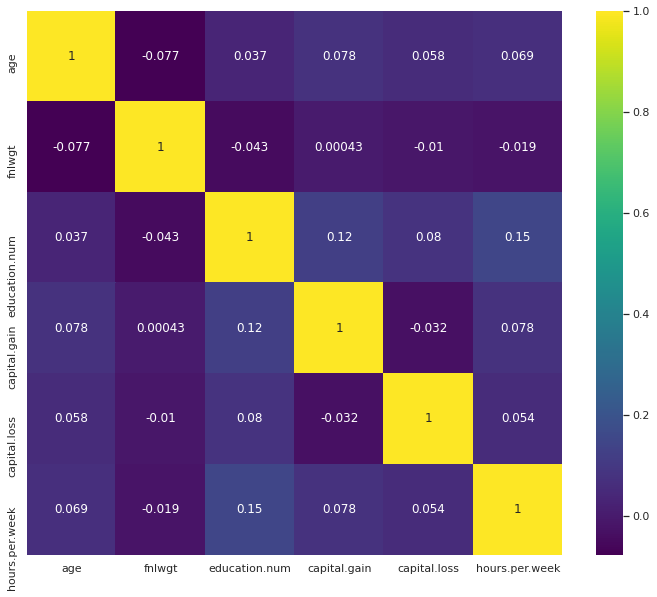

In [39]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap='viridis', annot = True)

In [12]:
x = data.drop(['income'],axis=1)
y = data['income']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn import preprocessing
categorical = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']

for feature in categorical:
    le = preprocessing.LabelEncoder()
    x_train[feature] = le.fit_transform(x_train[feature])
    x_test[feature] = le.transform(x_test[feature])

/home/shaheer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shaheer/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=x.columns)

In [16]:
x_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768,-1.258387,0.262402
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768,-0.447517,0.262402
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768,-0.042081,0.262402
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768,-1.663822,0.262402
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768,-0.042081,0.262402


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_preds = model.predict(x_test)

In [19]:
accuracy_score(y_test,y_preds)

0.8249654537079687

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_preds,y_test)

array([[4663,  827],
       [ 313,  710]])

In [20]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
log_reg = {'C':np.logspace(-4,4,30),
          'solver':["liblinear","newton-cg"]}
new_model = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg,
                              cv=5,
                              n_iter=20,
                              verbose=True)
new_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+0

In [21]:
new_model.best_params_

{'solver': 'newton-cg', 'C': 0.20433597178569418}

In [22]:
new_model.score(x_test,y_test)

0.8249654537079687

In [24]:
model2 = LogisticRegression(solver='newton-cg',
                           C=0.20433597178569418)

In [25]:
model2.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
new_preds = model2.predict(x_test)

In [27]:
accuracy_score(new_preds,y_test)

0.8249654537079687

In [28]:
confusion_matrix(new_preds,y_test)

array([[4665,  829],
       [ 311,  708]])

In [29]:
model2.score(x_test,y_test)

0.8249654537079687

In [30]:
grid = GridSearchCV(LogisticRegression(),
                   param_grid=log_reg,
                   cv=5,
                   verbose=True)

In [31]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [32]:
grid.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [33]:
model3 = LogisticRegression(solver='liblinear',
                           C=0.05736152510448681)
model3.fit(x_train,y_train)

LogisticRegression(C=0.05736152510448681, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
preds3 = model3.predict(x_test)

In [38]:
confusion_matrix(y_test,preds3)

array([[4665,  311],
       [ 833,  704]])

In [36]:
model.score(x_test,y_test)

0.8249654537079687

In [37]:
accuracy_score(y_test,preds3)

0.8243512974051896